Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


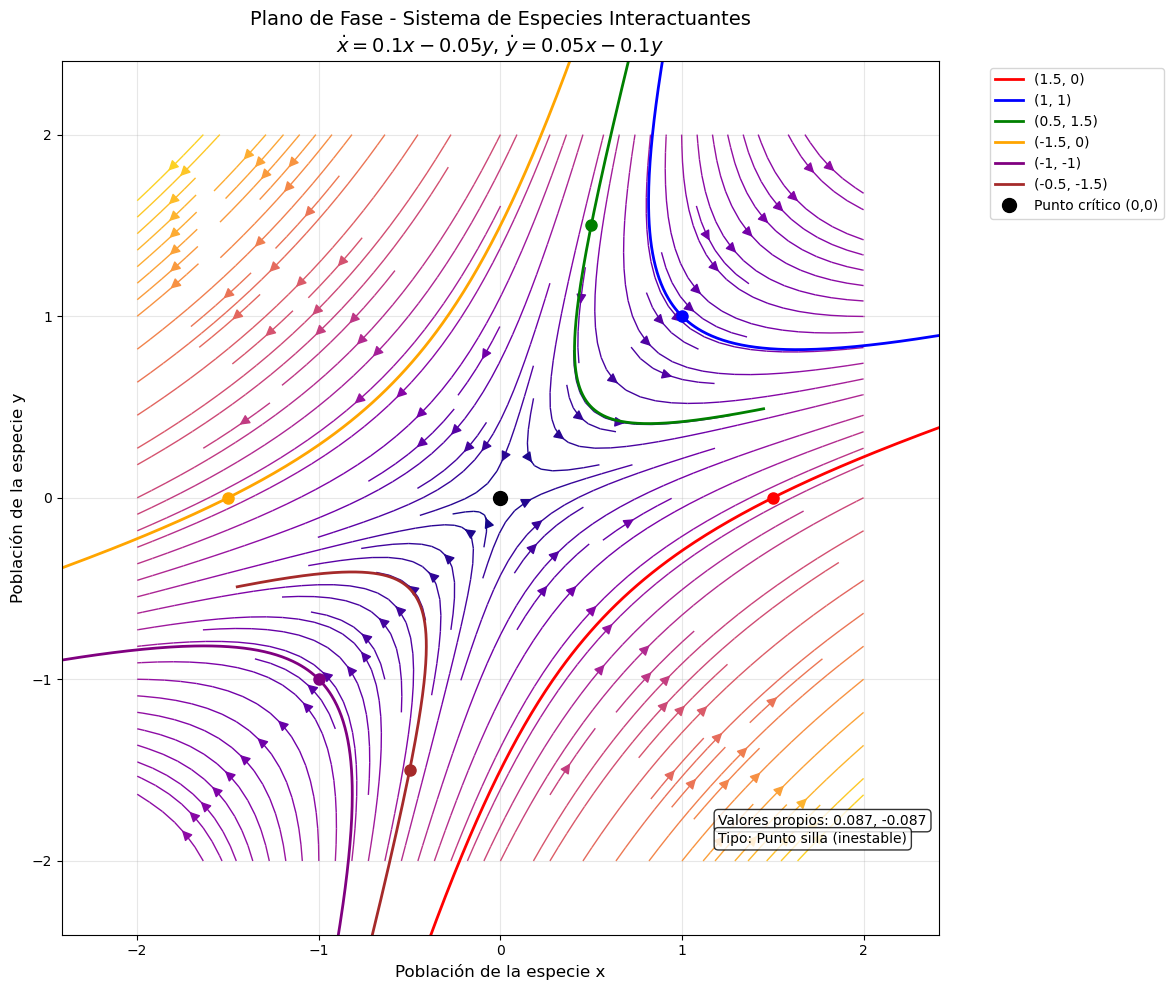

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Sistema de ecuaciones
def sistema(t, variables):
    x, y = variables
    dxdt = 0.1*x - 0.05*y
    dydt = 0.05*x - 0.1*y
    return [dxdt, dydt]

# Crear malla más densa para streamplot
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(x, y)

DX, DY = sistema(0, [X, Y])

# Crear figura
plt.figure(figsize=(12, 10))

# Usar streamplot para un diagrama más fluido
plt.streamplot(X, Y, DX, DY, density=1.5, color=np.sqrt(DX**2 + DY**2), 
               cmap='plasma', linewidth=1, arrowsize=1.5)

# Añadir algunas trayectorias específicas
condiciones_iniciales = [
    [1.5, 0], [1, 1], [0.5, 1.5],
    [-1.5, 0], [-1, -1], [-0.5, -1.5]
]

colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

for i, (x0, y0) in enumerate(condiciones_iniciales):
    # Integrar hacia adelante
    sol_forward = solve_ivp(sistema, [0, 30], [x0, y0], 
                           t_eval=np.linspace(0, 30, 300), method='RK45')
    
    # Integrar hacia atrás
    sol_backward = solve_ivp(sistema, [0, -30], [x0, y0], 
                            t_eval=np.linspace(0, -30, 300), method='RK45')
    
    # Combinar trayectorias
    x_traj = np.concatenate([sol_backward.y[0][::-1], sol_forward.y[0]])
    y_traj = np.concatenate([sol_backward.y[1][::-1], sol_forward.y[1]])
    
    plt.plot(x_traj, y_traj, color=colores[i], linewidth=2, 
             label=f'({x0}, {y0})')
    plt.plot(x0, y0, 'o', color=colores[i], markersize=8)

# Punto crítico
plt.plot(0, 0, 'ko', markersize=10, label='Punto crítico (0,0)')

# Configuración final
plt.xlabel('Población de la especie x', fontsize=12)
plt.ylabel('Población de la especie y', fontsize=12)
plt.title('Plano de Fase - Sistema de Especies Interactuantes\n' +
          r'$\dot{x} = 0.1x - 0.05y$, $\dot{y} = 0.05x - 0.1y$', 
          fontsize=14)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir información del análisis
A = np.array([[0.1, -0.05], [0.05, -0.1]])
valores_propios = np.linalg.eigvals(A)

plt.text(1.2, -1.8, f'Valores propios: {valores_propios[0]:.3f}, {valores_propios[1]:.3f}', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
plt.text(1.2, -1.9, 'Tipo: Punto silla (inestable)', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()